<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          14068        399  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1952         42  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35           1286         36  1.0              
pantanjali/unemployment-dataset                                Un

In [ ]:
! kaggle datasets download -d fazlayrabbi3/autistic-children-facial-dataset

 89% 90.0M/101M [00:01<00:00, 69.6MB/s]
100% 101M/101M [00:01<00:00, 68.9MB/s] 


In [ ]:
!unzip /content/autistic-children-facial-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Autism/consolidated/autistic/0873.jpg  
  inflating: Autism/consolidated/autistic/0874.jpg  
  inflating: Autism/consolidated/autistic/0875.jpg  
  inflating: Autism/consolidated/autistic/0876.jpg  
  inflating: Autism/consolidated/autistic/0877.jpg  
  inflating: Autism/consolidated/autistic/0878.jpg  
  inflating: Autism/consolidated/autistic/0879.jpg  
  inflating: Autism/consolidated/autistic/0880.jpg  
  inflating: Autism/consolidated/autistic/0881.jpg  
  inflating: Autism/consolidated/autistic/0882.jpg  
  inflating: Autism/consolidated/autistic/0883.jpg  
  inflating: Autism/consolidated/autistic/0884.jpg  
  inflating: Autism/consolidated/autistic/0885.jpg  
  inflating: Autism/consolidated/autistic/0886.jpg  
  inflating: Autism/consolidated/autistic/0887.jpg  
  inflating: Autism/consolidated/autistic/0888.jpg  
  inflating: Autism/consolidated/autistic/0889.jpg  
  inflating: Autism/consolidated/autistic/0890.j

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir="/content/Autism/train"
val_dir="/content/Autism/test"

In [ ]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=1,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=1,seed=42)

Found 2536 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
model_2=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2,activation="softmax")
                                    
                                    
                                    
])

In [ ]:
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [ ]:
history_1=model_2.fit(train_data,
                      epochs=100,
                      
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/100
2536/2536 [==============================] - 17s 6ms/step - loss: 0.6688 - accuracy: 0.6203 - val_loss: 0.5808 - val_accuracy: 0.7100
Epoch 2/100
2536/2536 [==============================] - 16s 6ms/step - loss: 0.5621 - accuracy: 0.7129 - val_loss: 0.5325 - val_accuracy: 0.7233
Epoch 3/100
2536/2536 [==============================] - 16s 6ms/step - loss: 0.4540 - accuracy: 0.7953 - val_loss: 0.5797 - val_accuracy: 0.7433
Epoch 4/100
2536/2536 [==============================] - 16s 6ms/step - loss: 0.2849 - accuracy: 0.8766 - val_loss: 0.7229 - val_accuracy: 0.7033
Epoch 5/100
2536/2536 [==============================] - 16s 6ms/step - loss: 0.1331 - accuracy: 0.9483 - val_loss: 0.7946 - val_accuracy: 0.7100
Epoch 6/100
2536/2536 [==============================] - 16s 6ms/step - loss: 0.0638 - accuracy: 0.9775 - val_loss: 1.3978 - val_accuracy: 0.7167
Epoch 7/100
2536/2536 [==============================] - 16s 6ms/step - loss: 0.0246 - accuracy: 0.9905 - val_loss: 1.8053 -

In [ ]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_2.predict(X)
  val=str(val)
  print(val)
  #print(val[[0]])
  if val=="[[1. 0.]]":
    plt.xlabel("Autism",fontsize=30)
  elif val=="[[0. 1.]]":
    plt.xlabel("No Autism",fontsize=30)

[[1. 0.]]


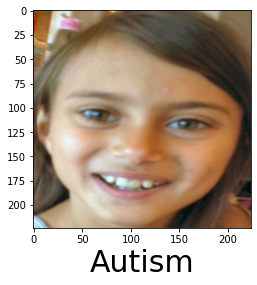

In [ ]:
predictImage("/content/Autism/test/autistic/002.jpg")

In [ ]:
from tensorflow import keras

In [ ]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_2=AlexNet.fit(train_data,
                      epochs=100,
                      
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/100
2536/2536 [==============================] - 70s 27ms/step - loss: 0.8792 - accuracy: 0.5883 - val_loss: 0.7233 - val_accuracy: 0.6200
Epoch 2/100
2536/2536 [==============================] - 31s 12ms/step - loss: 0.7233 - accuracy: 0.6349 - val_loss: 0.7438 - val_accuracy: 0.5900
Epoch 3/100
2536/2536 [==============================] - 31s 12ms/step - loss: 0.6670 - accuracy: 0.6550 - val_loss: 0.6364 - val_accuracy: 0.6333
Epoch 4/100
2536/2536 [==============================] - 31s 12ms/step - loss: 0.6213 - accuracy: 0.6735 - val_loss: 0.6552 - val_accuracy: 0.6700
Epoch 5/100
2536/2536 [==============================] - 30s 12ms/step - loss: 0.5929 - accuracy: 0.6948 - val_loss: 0.6433 - val_accuracy: 0.6400
Epoch 6/100
2536/2536 [==============================] - 30s 12ms/step - loss: 0.5645 - accuracy: 0.7141 - val_loss: 0.6154 - val_accuracy: 0.6600
Epoch 7/100
2536/2536 [==============================] - 30s 12ms/step - loss: 0.5275 - accuracy: 0.7303 - val_loss: 0